# Data Cleaning - Veri Temizleme

**1-) Handling Missing Values ( Eksik Değerleri İşleme )**

Veri temizleme veri biliminin önemli bir parçasıdır. Ancak çok sinir bozucu olabilir. Bozuk metinler, eksik değerler, düzensiz tarih formatları, tutarsız veriler, gibi sorunlara çözüm arayacağız.

Bu derste dataset olarak amerikan futbolu oyunlarında meydana gelen olayların veri kümesini kullanacağız.

In [ ]:
import pandas as pd
import numpy as np

# csv formatındaki verinin okunması.
nfl_data = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

# tekrarlanabilirlik.
np.random.seed(0) 

In [5]:
# dataset yüklediğinde verilere genel olarak bakmak verisetimiz hakkında ön bilgi almak açısından iyi olabilir.

nfl_data.head() # ilk 5 satırı getirir.

# zaten direkt olarak NaN ( Not a Number - sayı değil) veri tiplerini görebiliyoruz.

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


**Kaç tane eksik veri noktamız var ?**

Peki artık eksik değerlerimiz olduğunu biliyoruz. Bakalım her sütunda kaç tane eksik değer var.

In [6]:
# sütun başına eksik veri noktalarının sayısını 
eksik_deger_sayisi = nfl_data.isnull().sum()

# ilk on sütundaki eksik noktaların sayısı
eksik_deger_sayisi[0:10]

play_id              0
game_id              0
home_team            0
away_team            0
posteam          13242
posteam_type     12879
defteam          12879
side_of_field      600
yardline_100     13070
game_date            0
dtype: int64

Eksik veriler bir hayli fazla. Yüzde olarak hesaplayalım

In [8]:
# kaç tane eksik değerimiz var?
toplam_hucre = np.product(nfl_data.shape)
toplam_eksik_deger = eksik_deger_sayisi.sum()

# eksik olan verilerin yüzdesi
eksik_deger_yuzdelik = (toplam_eksik_deger/toplam_hucre) * 100
print(eksik_deger_yuzdelik)

38.50391490571942


**Bu noktada** neler yapabiliriz. Verilerimizi inceledik. Ve %38'lik bir kısmının eksik olduğunu gördük. Peki bu dataset neden böyle.Bu eksik veriler bizim analizlerimizi nasıl etkiler. ( **data intution** ) Bu durumu anlamaya çalışmak için kendimize sorabileceğimiz en önemli sorular şunlardır: 

*1-) Bu değerler kaydedilmediği için mi yoksa mevcut olmadığı için mi eksik?*

* Eğer bir değer mevcut olmadı için eksikse ( örneğin çocuğu olmayan bir kişinin en büyük çocuğunun boyu gibi ) o zaman bu gibi verileri NaN olarak saklamak isteyebiliriz.
* Ancak kaydedilmediği için eksik bir değer mevcutsa o sütun ve satırdaki diğer verilere dayanarak ne olabileceğini tahmin etmeye çalışabiliriz. Buna **imputation** denir. 

**Drop Missing Values - Eksik Değerleri Silme:**

Eğer çok önemli bir projede çalışmıyorsanız ve işiniz acele ise uygulayabileceğimiz seçeneklerden bir tanesi eksik değerleri içeren satır ve sutunları kaldırmaktır. ( Önemli projeler için önerilmez ) Eğer bu işlemi yapmak istersek pandas'ın **dropna()** metodu bu iş içindir.

In [20]:
# eksik değer içeren tüm satırları kaldır.
nfl_data.dropna()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv


Yukarıdaki çıktıdan da anlayacağımız üzere tüm verilerimiz silindi. Bunun nedeni verisetimizin her satırında en az bir eksik değere sahip olmamız. Bunun yerine en az bir eksik değeri olan tüm sutünları kaldırmayı deneyelim.

In [21]:
# en az bir eksik değer içeren sutünları kaldır.
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,play_id,game_id,home_team,away_team,game_date,game_half,quarter_end,drive,sp,qtr,...,total_away_pass_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,replay_or_challenge
0,46,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,68,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-0.004655,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0
2,92,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-0.004655,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0
3,113,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.044921,-0.028383,0.028383,0.033038,-0.033038,0.081542,-0.081542,-0.126463,0.126463,0
4,139,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.044921,-0.028383,0.028383,0.033038,-0.033038,0.081542,-0.081542,-0.126463,0.126463,0


In [22]:
# ne kadar veri kaybettik?
print("Orjinal veri kümesindeki sutünlar: %d \n" % nfl_data.shape[1])
print("NaN'ların silinmiş hali ile sutünlar: %d" % columns_with_na_dropped.shape[1])

Orjinal veri kümesindeki sutünlar: 255 

NaN'ların silinmiş hali ile sutünlar: 50


Oldukça fazla veri kaybettik. Ancak tüm NaN'lardan kurtulduk.

**Eksik değerleri otomatik olarak doldurma:**
* Başka bir yöntem ise eksik değerlerin yerini doldurmaktır. Örneğimizin daha iyi çalışması için NFL datasetimizinden küçük bir batch alalım.

In [26]:
# datasetimizden küçük bir alt küme alalım.
altkume_nfl_data = nfl_data.loc[:, 'penalty_player_id':'penalty_type'].head()
altkume_nfl_data

,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type
0,NaN,NaN,NaN,0,NaN,NaN
1,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,0,NaN,NaN
3,NaN,NaN,NaN,0,NaN,NaN
4,NaN,NaN,NaN,0,NaN,NaN


1-) Eksik verilerimizi doldurmak için pandas'ın **fillna()** metodunu kullanabiliriz. Yapmamız gereken NaN değerleri yerine ne gelmesi gerektiğini belirtmektir.

In [27]:
# NaN'lara 0 ata.
altkume_nfl_data.fillna(0)

,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type
0,0,0,0.0,0,0,0
1,0,0,0.0,0,0,0
2,0,0,0.0,0,0,0
3,0,0,0.0,0,0,0
4,0,0,0.0,0,0,0


2-) Yada eksik değerlerin yerine aynı sutünda doğrudan peşinden gelen herhangi bir değer ile değiştireiliriz. 

In [29]:
# tüm na'ları doğrudan aynı sütunda ondan sonra gelen değerle değiştirin,
# sonra kalan tüm na'ları 0 ile değiştirin
altkume_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type
0,0.0,0.0,0.0,0,0.0,0.0
1,0.0,0.0,0.0,0,0.0,0.0
2,0.0,0.0,0.0,0,0.0,0.0
3,0.0,0.0,0.0,0,0.0,0.0
4,0.0,0.0,0.0,0,0.0,0.0


**2-) Scaling and Normalization**

İkinci bölümde sayısal değişkenleri yararlı özelliklere sahip olacak şekilde dönüştüreceğiz. Verileri nasıl ölçeklendireceğimize ve normalleştireceğimize (ve ikisi arasındaki farkın ne olduğuna) bakacağız.

In [1]:
# kütüphaneler.
import pandas as pd
import numpy as np
from scipy import stats
# min_max scaling
from mlxtend.preprocessing import minmax_scaling
# görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
# tekrarlanabilirlik
np.random.seed(0)

**Ölçeklendirme ve Normalleştirme: Fark nedir?**

**ölçeklendirmede**, verilerinizin aralığını değiştirirken
**normalleştirmede**, verilerinizin dağıtım şeklini değiştiriyorsunuz.

**Scaling ( ölçeklendirme ):**

* Verilerinizi 0-100 veya 0-1 gibi belirli bir ölçeğe sığacak şekilde dönüştürdüğünüz anlamına gelir. Destek vektör makineleri (SVM) veya k-en yakın komşular (KNN) gibi veri noktalarının birbirinden ne kadar uzakta olduğuna ilişkin ölçümlere dayalı makine öğrenim yöntemleri kullanırken verileri ölçeklendirmek zorundayız.

* Değişkenlerimizi ölçeklendirmek, farklı değişkenleri eşit olarak karşılaştırmanıza yardımcı olur. Örneğin içerisinde hem Tl hemde dolar cinsinden veri bulunan datasetimizde 1 dolar = 13 tl ye denk gelmekte. Eğer scaling işlemi yapılmaz ise sistemimiz 1 doları 1 tl gibi algıyarak yanlış sonuçlar almamıza neden olabilir.

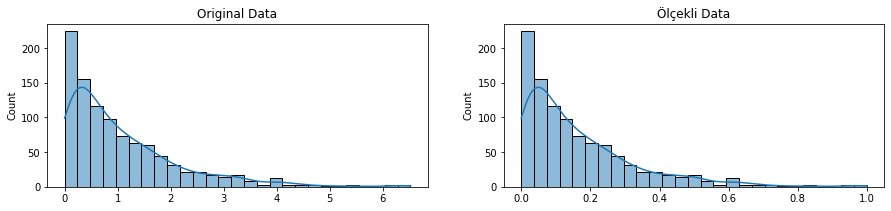

In [3]:
# rastgele 1000 veri noktası.
original_data = np.random.exponential(size=1000)

# verilerimizi 0-1 arasında ölçeklendirelim.
scaled_data = minmax_scaling(original_data, columns=[0])

# iki datayı karşılaştıralım.
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Ölçekli Data")
plt.show()

Verilerimizin şeklinin değişmediğine ancak orjinal data' da 0-8 arasında olan x ekseninin , ölçekli data da 0-1 arasında olduğunu hepimiz gözlemledik.

**Normalization ( Normalleştirme ):**

Ölçeklendirme yalnızca verilerinizin aralığını değiştirir. Normalleşme daha radikal bir dönüşümdür. Normalleşmenin amacı gözlemlerinizi normal dağılım olarak tanımlanabilecek şekilde değiştirmektir.Normal dağılım: "Çan eğrisi" olarak da bilinir, kabaca eşit gözlemlerin ortalamanın üstüne ve altına düştüğü, ortalama ve ortancanın aynı olduğu ve ortalamaya daha yakın gözlemlerin olduğu belirli bir istatistiksel dağılımdır. Normal dağılım Gauss dağılımı olarak da bilinir.

Makine öğrenim algoritmalarından LDA ve Gauss Naive Bayes verileri normalize olarak bekler. Burada normalleştirmek için kullandığımız yönteme **Box-Cox Transformation** denir.

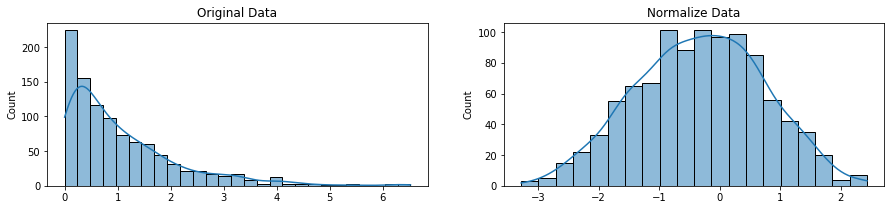

In [5]:
# boxcox yöntemi ile üssel verilerimizi normalleştirelim.
normalized_data = stats.boxcox(original_data)

# before/after yapalım.
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalize Data")
plt.show()

**3-) Parsing Dates - Tarih Formatları İle Çalışma.**

Herzaman ki gibi ilk olarak yapmamız gereken şey ilgili kütüphaneleri ve verisetimizi yüklemek olacaktır. 2007-2016 yılları arasında meydana gelen heyelanlarla ilgili bilgileri içeren bir veri kümesiyle çalışacağız. 

In [7]:
# modüllerimizi import edelim.
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# verisetimizi yükleyelim.
heyelanlar = pd.read_csv("catalog.csv")

# tekrarlanabilirlik.
np.random.seed(0)

In [8]:
heyelanlar.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Bu örneğimizde 'date' sütunu ile çalışacağız.

In [9]:
# date sütunun ilk 5 satırına bakalım
print(heyelanlar['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


* Şimdi yukarıdaki çıktıyı yorumlayalım. Biz ilgili çıktının tarih olduğunu anlayabiliyoruz. Ancak bilgisayar bunu object olarak sınıflandırmış. Pandas tarih olarak datetime64 veri tipini bilir.

**Tarih sütunlarımızı datetime'a dönüştürme**

In [12]:
# 1/17/07 "% m /% d/% y" 
# 17-1-2007 "% d-% m-% Y" 
# Heyelan veri kümesindeki "tarih" sütununun başına baktığımızda, "ay / gün / iki basamaklı yıl" biçiminde olduğunu görebiliriz.
# Böylece tarihlerimizde ilk örnekle aynı sözdizimini kullanabiliriz.

# düzenlenen tarihleri data_parsed adlı yeni sutüna yazalım.
heyelanlar['date_parsed'] = pd.to_datetime(heyelanlar['date'], format="%m/%d/%y")

In [14]:
# tamamdır şimdi ise data_parsed sütununu kontrol edelim.

heyelanlar['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Yukarıdaki çıktıya bakacak olursa artık datasetimizdeki tarihler istediğimiz formatta ve istediğimiz düzende. Şöyle bir soru sorabiliriz. Date kolonu içinde birbirinden farklı birden fazla tarih biçimi ile ilgili bir hata ile karşılaşırsak ne olur ? Çözüm aşağıda.

In [16]:
heyelanlar['date_parsed'] = pd.to_datetime(heyelanlar['date'], infer_datetime_format=True)

In [17]:
# data_parsed sütunundan ayın gününü alma.
ayın_gunu_heyelanlar = heyelanlar['date_parsed'].dt.day
ayın_gunu_heyelanlar.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

**Not:** Eğer orjinal data içerinden günleri çekmeye çalışşaydık, hata alacaktık.(AttributeError) Bunun nedeni ise **dt**'nin yalnızca datetime üzerinde işlem yapabilmesidir. Object türünü tanımaz.

Aldığımız günleri histogram grafiğinde kontrol ederek ayrımın doğruluğuna bakabiliriz. Sonuçların 1-31 arasında olmasını bekleriz.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

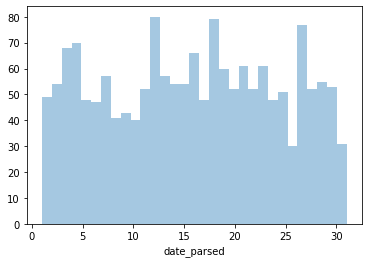

In [18]:
# date kolonu içinde NaN varsa silelim.
ayın_gunu_heyelanlar = ayın_gunu_heyelanlar.dropna()

# ay içerisindeki günleri çizdirelim.
sns.distplot(ayın_gunu_heyelanlar, kde=False, bins=31)

**4-) Character Encodings - Karakter Kodlama**

In [19]:
# kütüphanelerin yüklenmesi.
import pandas as pd
import numpy as np
# karakter kodlama modülü.
import chardet
# tekrarlanabilirlik.
np.random.seed(0)

**Karakter kodlamaları**, ham ikili bayt dizelerinden (şuna benzer: 0110100001101001), insan tarafından okunabilir metni oluşturan karakterlere ("merhaba" gibi) eşleme için belirli kurallar kümeleridir.

Karakter kodlama uyuşmazlıkları bugün eskisinden daha az yaygındır, ancak kesinlikle hala bir sorundur. Çok sayıda farklı karakter kodlaması vardır, ancak bilmeniz gereken en önemli şey **UTF-8**'dir.

UTF-8 standart metin kodlamasıdır. Tüm Python kodu UTF-8'de bulunur. Tüm metnimizi mümkün olan en kısa sürede UTF-8'e dönüştürmek istiyoruz.Karşılaşacağınız dosyaların çoğu muhtemelen UTF-8 ile kodlanacaktır. Python'un varsayılan olarak beklediği şey budur, bu nedenle çoğu zaman sorunlarla karşılaşmazsınız. Ancak bazen sorunlar meydana gelebilir. ( UnicodeDecodeError )

**UTF-8 kodlaması ile dosyalarınızı kaydetme**

UTF-8 Python'da standart kodlama olduğundan, bir dosyayı kaydettiğinizde varsayılan olarak UTF-8 olarak kaydedilecektir.

**5-) Inconsistent Data Entry - Tutarsız Veri Girişi**

* Verimizdeki yazım hatalarını düzelteceğiz.
* Tutarsız metin girişlerini nasıl temizleyeceğimize bakacağız.

In [3]:
# modüllerin yüklenmesi.
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# verisetimizin yüklenmesi.
profesör = pd.read_csv("pakistan_intellectual_capital.csv")

# tekrarlanabilirlik.
np.random.seed(0)

In [4]:
profesör.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Ülke sütuni ile çalışacağız.

In [7]:
# 'ülke' sütunundaki tüm benzersiz değerleri alalım.
countries = profesör['Country'].unique()

# alfabetik olarak sıralayalım.
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

* Germany yerine germany verisi
* Yapacağım ilk şey, her şeyi küçük harf yapmak (istersem sonunda değiştirebilirim) ve hücrelerin başında ve sonundaki boşlukları kaldırmaktır. Büyük harf kullanımı ve sondaki boşluklardaki tutarsızlıklar metin verilerinde çok yaygındır ve bunu yaparak metin veri girişi tutarsızlıklarınızın % 80'ini düzeltebiliriz.

In [8]:
# küçük harfe dönüştürelim.
profesör['Country'] = professors['Country'].str.lower()
# boşlukları silelim.
profesör['Country'] = professors['Country'].str.strip()

In [9]:
profesör['Country'].head()

0    thailand
1    thailand
2    thailand
3    thailand
4    pakistan
Name: Country, dtype: object

**Tutarsız veri girişini düzeltmek için bulanık eşleştirmeyi kullanma (fuzzy matching )**

In [10]:
# benzersiz değerleri alalım.
countries = professors['Country'].unique()

# sıralayalım.
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

Verimizde hala bir tutarsızlık var . southkorea ile south korea aynı olmalı.

Hangi dizelerin birbirine en yakın olduğunu belirlemek için  **fuzzy wuzzy** ( bulanık eşleme: Hedef dizeye çok benzeyen metin dizelerini otomatik olarak bulma işlemi, her zaman bulanık eşleşmeye % 100 güvenemezsiniz, ancak genellikle size en azından biraz zaman kazandırır.) paketini kullanacağız.

In [13]:
# "güney kore" ye en yakın ilk 10 
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [14]:
# Oranı 47 ve üstü olan tüm satırları güney kore ile değiştireceğiz.

def sutundaki_eslemeleri_degistir(df, column, string_to_match, min_ratio = 47):
    # benzersiz dizelerin listesi.
    strings = df[column].unique()
    
    # verilen değere en yakın 10 değeri al.
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # sadece 90 üzeri eşleşmeleri al.
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # veri çerçevemizdeki tüm yakın eşleşmelerin satırlarını alın.
    rows_with_matches = df[column].isin(close_matches)

    # tüm satırları giriş eşleşmeleriyle yakın eşleşmelerle değiştirin.
    df.loc[rows_with_matches, column] = string_to_match
    
    print("İşlemleri başarı ile tamamladım!")

In [15]:
# sutundaki_eslemeleri_degistir fonksiyonumuzu kullanalım.

sutundaki_eslemeleri_degistir(df=profesör, column='Country', string_to_match="south korea")

İşlemleri başarı ile tamamladım!


*Ve şimdi "Ülke" sütunumuzdaki benzersiz değerleri tekrar kontrol edelim ve "güney Kore" yi doğru bir şekilde düzenlediğimizden emin olalım.*

In [16]:
# benzersiz değerleri al.
countries = profesör['Country'].unique()

# sıralama yap.
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)